In [1]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [2]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=41, climo_ye=50, ts_ys=1, ts_ye=50)
rst_root = data_root['rst_root']
climo_root = data_root['climo_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.0051-01-01_00000.nc'

Running on machine pn1803144.lanl.gov


In [3]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)
f_rst = mpasmesh.load()
mpasdata = MPASOData(filepath=rst_file, filepath_mesh=rst_file)

## Cross sections

In [4]:
# cross section 1
s1_s_lat = 63
s1_s_lon = 296
s1_e_lat = 50
s1_e_lon = 320
# cross section 2 (WOCE AR7W)
s2_s_lat = 53.5
s2_s_lon = 304.5
s2_e_lat = 61
s2_e_lon = 312
# list of depths
depth_list = [0, 100, 200, 500, 1000]

In [10]:
# set endpoints
lonP0, latP0 = s2_s_lon, s2_s_lat
lonP1, latP1 = s2_e_lon, s2_e_lat
lonP2, latP2 = s1_e_lon, s1_e_lat
print('Endpoints:')
print('    P0: {:4.1f} {:4.1f}'.format(lonP0, latP0))
print('    P1: {:4.1f} {:4.1f}'.format(lonP1, latP1))
print('    P2: {:4.1f} {:4.1f}'.format(lonP2, latP2))
# get the shortest path
path0 = mpasmesh.get_shortest_path(lonP0, latP0, lonP1, latP1, debug_info=False) 
path1 = mpasmesh.get_shortest_path(lonP0, latP0, lonP2, latP2, debug_info=False) 
path2 = mpasmesh.get_shortest_path(lonP1, latP1, lonP2, latP2, debug_info=False) 

Endpoints:
    P0: 304.5 53.5
    P1: 312.0 61.0
    P2: 320.0 50.0
Vertex closest to P0: 304.6 53.4
Vertex closest to P1: 312.1 61.0
Vertex closest to P0: 304.6 53.4
Vertex closest to P1: 320.0 49.9
Vertex closest to P0: 312.1 61.0
Vertex closest to P1: 320.0 49.9


In [26]:
trnsct0 = VerticalTransect(name='P0P1', lon0=lonP0, lat0=latP0, lon1=lonP1, lat1=latP1, depth=5000)
transport0 = mpasdata.get_transport(trnsct0)
print(transport0)

User defined transect 'P0P1'.
Vertex closest to P0: 304.6 53.4
Vertex closest to P1: 312.1 61.0
[-2507120.94698368]


In [23]:
trnsct1 = VerticalTransect(name='P1P2', lon0=lonP1, lat0=latP1, lon1=lonP2, lat1=latP2, depth=5000)
transport1 = mpasdata.get_transport(trnsct1)
print(transport1)

User defined transect 'P1P2'.
Vertex closest to P0: 312.1 61.0
Vertex closest to P1: 320.0 49.9
[17272325.77748831]


In [24]:
trnsct2 = VerticalTransect(name='P2P0', lon0=lonP2, lat0=latP2, lon1=lonP0, lat1=latP0, depth=5000)
transport2 = mpasdata.get_transport(trnsct2)
print(transport2)

User defined transect 'P2P0'.
Vertex closest to P0: 320.0 49.9
Vertex closest to P1: 304.6 53.4
[-14140821.30183382]


In [27]:
transport0+transport1+transport2

array([624383.52867081])

In [36]:
trnsct3 = VerticalTransect(name='P2P1', lon0=lonP2, lat0=latP2, lon1=lonP1, lat1=latP1, depth=5000)
transport3 = mpasdata.get_transport(trnsct3)
print(transport3)

User defined transect 'P2P1'.
Vertex closest to P0: 320.0 49.9
Vertex closest to P1: 312.1 61.0
[-17272325.77748831]


In [34]:
path3 = mpasmesh.get_shortest_path(lonP2, latP2, lonP1, latP1, debug_info=False) 

Vertex closest to P0: 320.0 49.9
Vertex closest to P1: 312.1 61.0


## Bathymetry

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc
Plotting map of Bottom Depth (m) at region 'LabSea'


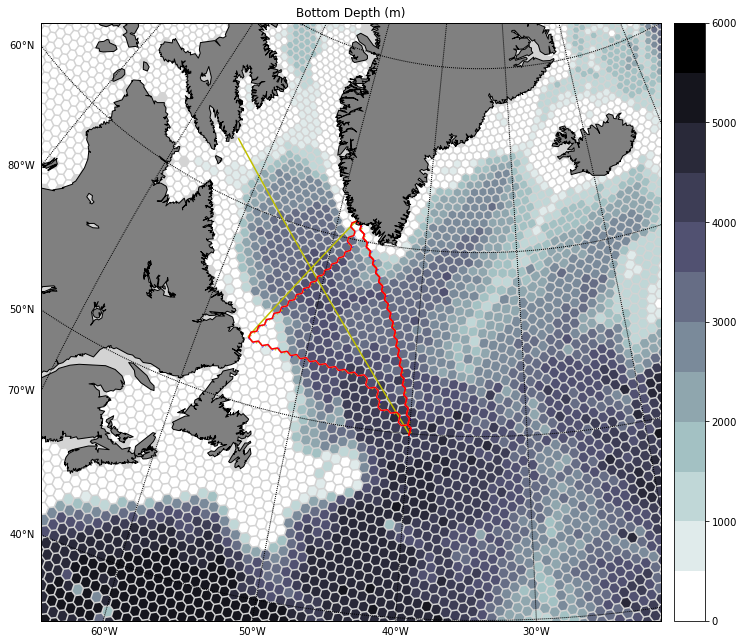

In [35]:
fig = plt.figure(figsize=[12,11])
levels = np.linspace(0, 6000, 13)
out = mpasmesh.get_map('bottomDepth', name='Bottom Depth'). \
      plot(region='LabSea', ptype='pcolor', cmap='bone_r', levels=levels)
m = out[0]
# plot cross sections
m.drawgreatcircle(s1_s_lon, s1_s_lat, s1_e_lon, s1_e_lat, color='y')
m.drawgreatcircle(s2_s_lon, s2_s_lat, s2_e_lon, s2_e_lat, color='y')
# plot paths
path0.plot_edge(m, c='r')
path0.plot_edge_center(m, c='y')
path0.plot_vertex(m, c='b')
path1.plot_edge(m, c='r')
path1.plot_edge_center(m, c='y')
path1.plot_vertex(m, c='b')
path2.plot_edge(m, c='r')
path2.plot_edge_center(m, c='y')
path2.plot_vertex(m, c='b')
path3.plot_edge(m, c='r')

mpasmesh.plot_edges(m, colors='lightgray')

plt.show()
# figname = fig_root+'/LabSea_bathymetry.png'
# fig.savefig(figname, dpi = 300)
# plt.close(fig)

## Salinity

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc
Nearest neighbor interpolation to 53 points.


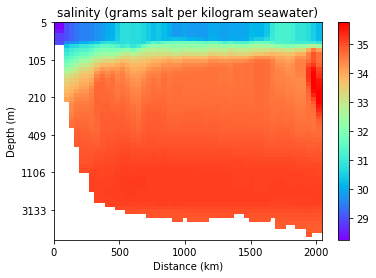

Nearest neighbor interpolation to 25 points.


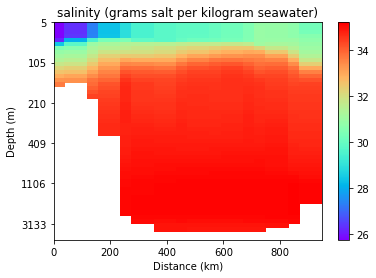

In [12]:
ncvar_data = f_rst.variables['salinity']
data = ncvar_data[0,:,:]
mpaso_data = MPASOVolume(data=data, mesh=mpasmesh, name=ncvar_data.long_name, units=ncvar_data.units)

# cross section 1
fig = plt.figure(figsize=[6,4])
mpaso_vcsec1 = mpaso_data.get_vertical_cross_section(lon0=s1_s_lon, lat0=s1_s_lat,
                                                     lon1=s1_e_lon, lat1=s1_e_lat)
mpaso_vcsec1.plot(ptype='pcolor', depth_mode='native')
plt.show()
# corss section 2
fig = plt.figure(figsize=[6,4])
mpaso_vcsec2 = mpaso_data.get_vertical_cross_section(lon0=s2_s_lon, lat0=s2_s_lat,
                                                     lon1=s2_e_lon, lat1=s2_e_lat, depth_bottom=4500)
mpaso_vcsec2.plot(ptype='pcolor', depth_mode='native')
plt.show()

In [20]:
ncvar_data   = f_rst.variables['normalVelocity']
layerThickness = f_rst.variables['layerThickness']
angleEdge = f_rst.variables['angleEdge'][:]
dvEdge = f_rst.variables['dvEdge'][:]
cellsOnEdge = f_rst.variables['cellsOnEdge'][:]
refMidDepth = mpaso_data.depth

# edge 0
idx_path_edge = path0.idx_edge
data_edge    = ncvar_data[0,idx_path_edge,:]
lon_edge     = path0.lon_edge
lat_edge     = path0.lat_edge
edge_signs   = path0.edge_signs
angle_edge   = angleEdge[idx_path_edge]
dv_edge      = dvEdge[idx_path_edge]
dist_edge    = gc_distance(lon_edge[0], lat_edge[0], lon_edge, lat_edge)
dh_edge_c1   = layerThickness[0,cellsOnEdge[idx_path_edge,0]-1,:]
dh_edge_c2   = layerThickness[0,cellsOnEdge[idx_path_edge,1]-1,:]
dh_edge = 0.5*(dh_edge_c1+dh_edge_c2)
print(dh_edge_c1-dh_edge_c2)
data_edge_proj = np.zeros(data_edge.shape)
for i in np.arange(refMidDepth.size):
    data_edge_proj[:, i] = data_edge[:,i]*edge_signs[:]
mpaso_obj_cs = MPASOVertCrossSection(data=data_edge_proj,
                                     lon=lon_edge, lat=lat_edge,
                                     dist=dist_edge, depth=refMidDepth,
                                     name=ncvar_data.long_name, units=ncvar_data.long_name)

[[0.07424992 0.07420922 0.07421142 ... 0.         0.         0.        ]
 [0.01263576 0.01265519 0.01268869 ... 0.         0.         0.        ]
 [0.00259588 0.00260041 0.00257581 ... 0.         0.         0.        ]
 ...
 [0.04550563 0.04546643 0.04551352 ... 0.         0.         0.        ]
 [0.02768751 0.02767143 0.02769454 ... 0.         0.         0.        ]
 [0.05371774 0.05368445 0.05369032 ... 0.         0.         0.        ]]


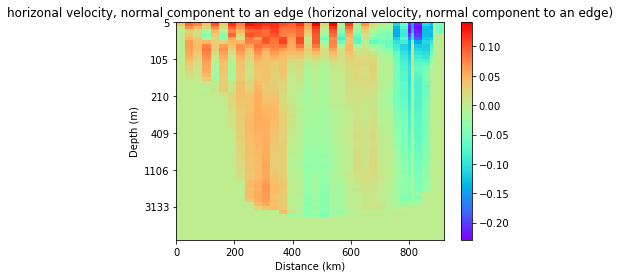

In [21]:
mpaso_obj_cs.plot(ptype='pcolor', depth_mode='native')

In [22]:
nz = refMidDepth.size
ni = len(idx_path_edge)
print(nz)
print(ni)
vol_trans = 0.0
for i in np.arange(nz):
    tmp = np.sum(data_edge_proj[:,i]*dv_edge*dh_edge[:,i])
    vol_trans = vol_trans+tmp 
print(vol_trans)

60
36
-2507120.946983679


In [15]:
# edge 1
data_edge1      = ncvar_data[0,idx_path_edge1, :]
lon_edge1       = lonEdge[idx_path_edge1]
lat_edge1       = latEdge[idx_path_edge1]
angle_edge1     = angleEdge[idx_path_edge1]
dv_edge1        = dvEdge[idx_path_edge1]
dist_edge1      = gc_distance(lon_edge1[0], lat_edge1[0], lon_edge1, lat_edge1)
dh_edge1_c1     = layerThickness[0,cellsOnEdge[idx_path_edge1,0],:]
dh_edge1_c2     = layerThickness[0,cellsOnEdge[idx_path_edge1,1],:]
dh_edge1 = 0.5*(dh_edge1_c1+dh_edge1_c2)
data_edge_proj1 = np.zeros(data_edge1.shape)
for i in np.arange(refMidDepth.size):
    data_edge_proj1[:, i] = data_edge1[:,i]*np.cos(angle_edge1)/np.abs(np.cos(angle_edge1))
mpaso_obj_cs1 = MPASOVertCrossSection(data=data_edge_proj1, lon=lon_edge1, lat=lat_edge1,
                                     dist=dist_edge1, depth=refMidDepth,
                                     name=ncvar_data.long_name, units=ncvar_data.long_name)

NameError: name 'idx_path_edge1' is not defined

In [ ]:
mpaso_obj_cs1.plot(ptype='pcolor', depth_mode='native')

In [ ]:
# edge 2
data_edge2      = ncvar_data[0,idx_path_edge2, :]
lon_edge2       = lonEdge[idx_path_edge2]
lat_edge2       = latEdge[idx_path_edge2]
angle_edge2     = angleEdge[idx_path_edge2]
dv_edge2        = dvEdge[idx_path_edge2]
dist_edge2      = gc_distance(lon_edge2[0], lat_edge2[0], lon_edge2, lat_edge2)
dh_edge2_c1     = layerThickness[0,cellsOnEdge[idx_path_edge2,0],:]
dh_edge2_c2     = layerThickness[0,cellsOnEdge[idx_path_edge2,1],:]
dh_edge2 = 0.5*(dh_edge2_c1+dh_edge2_c2)
data_edge_proj2 = np.zeros(data_edge2.shape)
for i in np.arange(refMidDepth.size):
    data_edge_proj2[:, i] = data_edge2[:,i]*np.cos(angle_edge2)/np.abs(np.cos(angle_edge2))
mpaso_obj_cs2 = MPASOVertCrossSection(data=data_edge_proj2, lon=lon_edge2, lat=lat_edge2,
                                     dist=dist_edge2, depth=refMidDepth,
                                     name=ncvar_data.long_name, units=ncvar_data.long_name)

In [ ]:
mpaso_obj_cs2.plot(ptype='pcolor', depth_mode='native')

In [ ]:
nz = refMidDepth.size
ni1 = len(idx_path_edge1)
print(nz)
print(ni1)
vol_trans1 = 0.0
for i in np.arange(nz):
#     tmp = np.sum(data_edge_proj1[:,i]*dv_edge1*refLayerThickness[i])
    tmp = np.sum(data_edge_proj1[:,i]*dv_edge1*dh_edge1[:,i])
    vol_trans1 = vol_trans1+tmp 
print(vol_trans1)

In [ ]:
nz = refMidDepth.size
ni2 = len(idx_path_edge2)
print(nz)
print(ni2)
vol_trans2 = 0.0
for i in np.arange(nz):
#     tmp = np.sum(data_edge_proj2[:,i]*dv_edge2*refLayerThickness[i])
    tmp = np.sum(data_edge_proj2[:,i]*dv_edge2*dh_edge2[:,i])
    vol_trans2 = vol_trans2+tmp 
print(vol_trans2)

In [ ]:
print(vol_trans+vol_trans1+vol_trans2)


In [ ]:
print(data_edge_proj[0, 0]*dv_edge[0]*refLayerThickness[0])
print(data_edge_proj[0,0])
print(dv_edge[0])
print(refLayerThickness[0])

In [ ]:
plt.scatter(dist_edge, np.cos(angle_edge))

In [ ]:
dv_edge